In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
plt.rcParams.update({'figure.autolayout': True})

In [5]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

formatter = FuncFormatter(currency)

C:\Users\biand\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


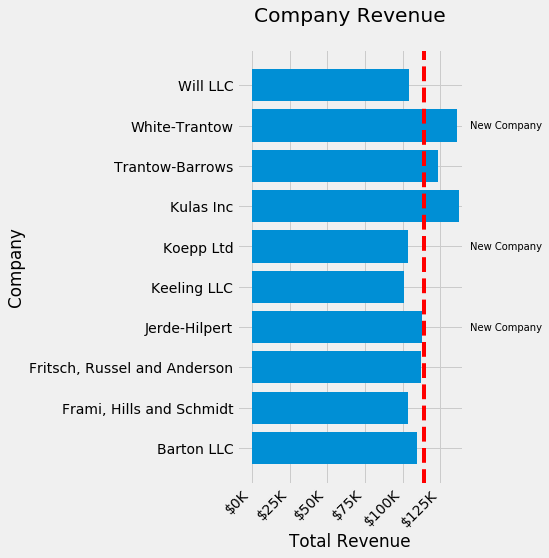

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we'll move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

In [14]:
y = input('input something')

In [15]:
y

'123'

In [16]:
eval(y)

123

In [17]:
def x_square(x):
    return x**2

In [18]:
x=[1,2,3]

In [22]:
y='abc'

In [25]:
z='xyz'

In [26]:
xyz = [(i,j,k) for i in x for j in y for k in z]

In [28]:
xyz

[(1, 'a', 'x'),
 (1, 'a', 'y'),
 (1, 'a', 'z'),
 (1, 'b', 'x'),
 (1, 'b', 'y'),
 (1, 'b', 'z'),
 (1, 'c', 'x'),
 (1, 'c', 'y'),
 (1, 'c', 'z'),
 (2, 'a', 'x'),
 (2, 'a', 'y'),
 (2, 'a', 'z'),
 (2, 'b', 'x'),
 (2, 'b', 'y'),
 (2, 'b', 'z'),
 (2, 'c', 'x'),
 (2, 'c', 'y'),
 (2, 'c', 'z'),
 (3, 'a', 'x'),
 (3, 'a', 'y'),
 (3, 'a', 'z'),
 (3, 'b', 'x'),
 (3, 'b', 'y'),
 (3, 'b', 'z'),
 (3, 'c', 'x'),
 (3, 'c', 'y'),
 (3, 'c', 'z')]

In [29]:
import itertools

In [36]:
list(itertools.combinations([1,2,3],3))

[(1, 2, 3)]

In [1]:
def adder(x:float, y:float):
    return x+y

In [2]:
print(adder(1,2))

3


In [3]:
print(adder('a','b'))

ab


In [4]:
import numpy as np
import seaborn as sns
from matplotlib.backends import backend_agg
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

def get_grid_values(xrange: tuple, yrange:tuple) -> tuple:
    return np.meshgrid(np.linspace(*xrange),
                        np.linspace(*yrange))

def get_field_components(distance: float, currents: tuple,
                        magconst: float, xrange: tuple,
                        yrange:tuple) -> tuple:
    (x, y) = get_grid_values(xrange, yrange)
    x1 = x - distance
    x2 = x + distance
    s12 = x1 ** 2 + y ** 2
    s22 = x2 ** 2 + y ** 2
    (I1, I2) = currents
    const = magconst / (s12 * s22)
    Bx = const * -y * ((I1 * s22) + (I2 * s12))
    By = const * ((I1 * s22 * x1) + (I2 * s12 * x2))
    return (Bx, By)

In [5]:
class Experiment:
    def __init__(self, d: float, Is: tuple,
                xrange, yrange, m: float=2.0e-7):
        self.distance = d
        self.magconst = m
        (self.current1, self.current2) = Is
        self.xrange = xrange
        (self.xmin, self.xmax, _) = xrange
        self.yrange = yrange
        (self.ymin, self.ymax, _) = yrange
        (self.x, self.y) = get_grid_values(xrange, yrange)
        self.ranges = [self.xmin, self.xmax,
                        self.ymin, self.ymax]
        (self.Bx, self.By) = get_field_components(
            self.distance, Is, self.magconst,
            self.xrange, self.yrange)
        self.B = self.Bx + self.By

In [6]:
from matplotlib.colors import LinearSegmentedColormap
class ExperimentPlotConfig:
    def __init__(self, size: tuple, title_size: int=14,
                label_size: int=10,
                bgcolor: str="#aaaaaa", num_colors: int=8,
                colorbar_adjust: float=1.0,
                aspect_ratio=1.0):
        self.size = size
        self.title_size = title_size
        self.label_size = label_size
        self.bgcolor = bgcolor
        self.num_colors = num_colors
        self.colorbar_adjust = colorbar_adjust
        self.aspect_ratio = aspect_ratio
    
    def fg_cmap(self, palette_name="husl"):
        colors = sns.color_palette(palette_name, self.num_colors)
        colors.reverse()
        return LinearSegmentedColormap.from_list(palette_name, colors)
        
    def bg_cmap(self):
        return sns.dark_palette(self.bgcolor, as_cmap=True)

In [12]:
class Plotter:
    def __init__(self, index, plot_config, experiment):
        self.cfg = plot_config
        self.data = experiment
        # self.figure_manager = backend_agg.new_figure_manager(
            # index, figsize=self.cfg.size)
        # self.figure = self.figure_manager.canvas.figure
        self.figure = plt.figure(index, figsize=self.cfg.size)
    
    def get_axes(self):
        gs = GridSpec(1, 1)
        return self.figure.add_subplot(gs[0, 0])

    def update_axes(self, axes):
        tmpl = ('Magnetic Field for Two Wires\n'
                '$I_1$={} A, $I_2$={} A, at d={} m')
        title = tmpl.format(self.data.current1,
                            self.data.current2,
                            self.data.distance)
        axes.set_title(
            title, fontsize=self.cfg.title_size)
        axes.set_xlabel(
            '$x$ m', fontsize=self.cfg.label_size)
        axes.set_ylabel(
            '$y$ m', fontsize=self.cfg.label_size)
        axes.axis(
            self.data.ranges,
            aspect=self.cfg.aspect_ratio)
        return axes
    
    def make_background(self, axes):
        return axes.imshow(
                self.data.B, extent=self.data.ranges,
                cmap=self.cfg.bg_cmap())

    def make_quiver(self, axes):
        return axes.quiver(
            self.data.x, self.data.y,
            self.data.Bx, self.data.By,
            self.data.B, cmap=self.cfg.fg_cmap())

    def make_colorbar(self, figure, quiver):
        return self.figure.colorbar(
            quiver, shrink=self.cfg.colorbar_adjust)

    def save(self, filename, **kwargs):
        axes = self.update_axes(self.get_axes())
        back = self.make_background(axes)
        quiver = self.make_quiver(axes)
        colorbar = self.make_colorbar(self.figure, quiver)
        self.figure.savefig(filename, **kwargs)
        print("Saved {}.".format(filename))

In [13]:
plot_config = ExperimentPlotConfig(
        size=(12,10),
        title_size=20,
        label_size=16,
        bgcolor="#666666",
        colorbar_adjust=0.96)

In [10]:
experiments = [
    Experiment(d=0.04, Is=(1,1),
            xrange=(-0.1, 0.1, 20),
            yrange=(-0.1, 0.1, 20)),
    Experiment(d=2.0, Is=(10,20),
            xrange=(-1.2, 1.2, 70),
            yrange=(-1.2, 1.2, 70)),
    Experiment(d=4.0, Is=(45,15),
            xrange=(-5.3, 5.3, 60),
            yrange=(-5.3, 5.3, 60)),
    Experiment(d=2.0, Is=(1,2),
            xrange=(-8.0, 8.0, 50),
            yrange=(-8.0, 8.0, 50))]

Saved expmt_0.png.
Saved expmt_1.png.
Saved expmt_2.png.
Saved expmt_3.png.


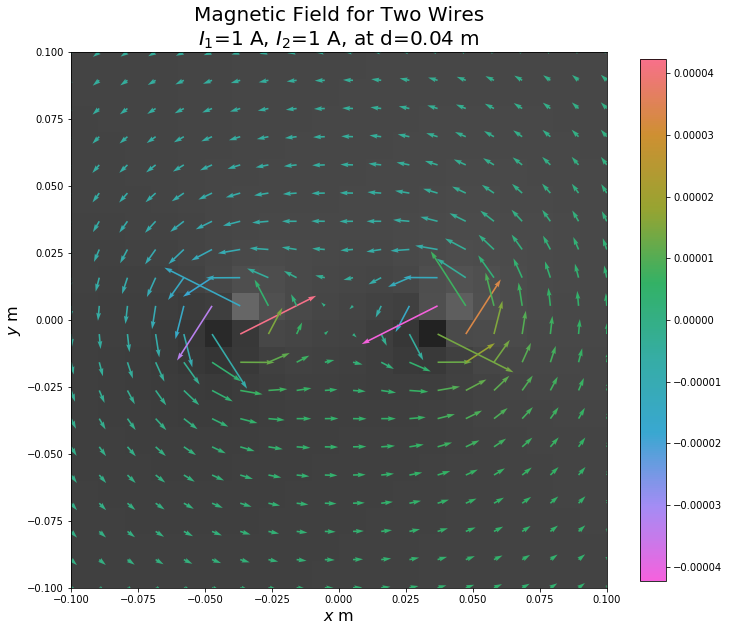

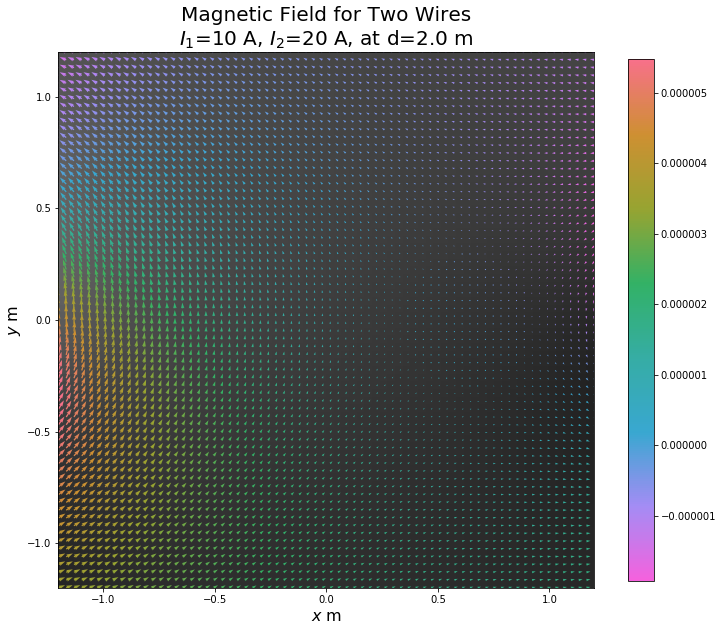

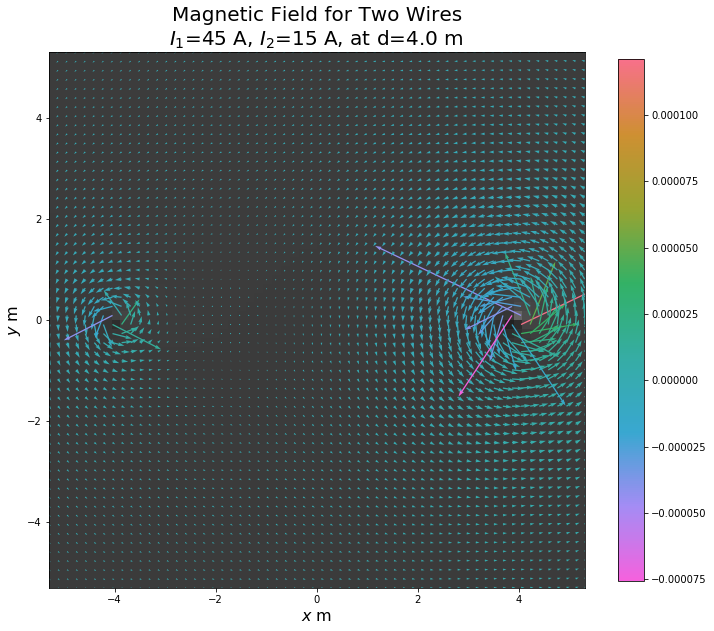

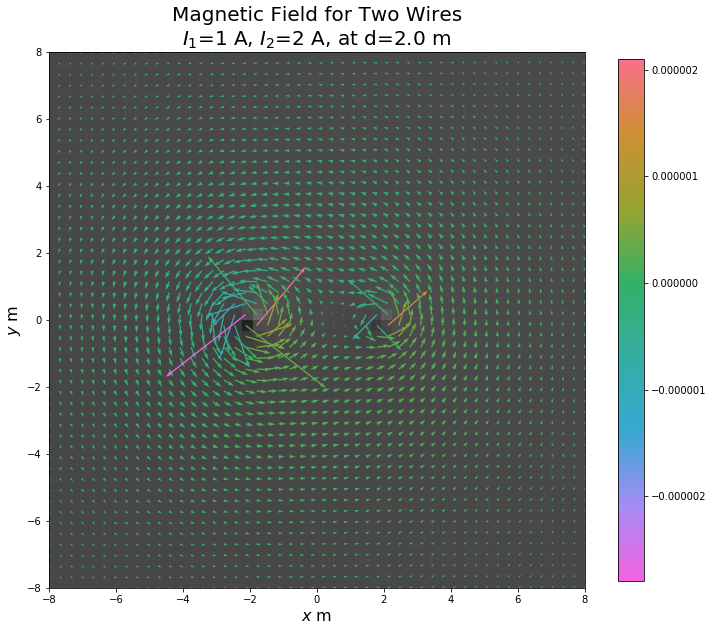

In [14]:
for (index, experiment) in enumerate(experiments):
    filename = "expmt_{}.png".format(index)
    Plotter(index,
            plot_config,
            experiment).save(filename)

In [15]:
from IPython.display import Image

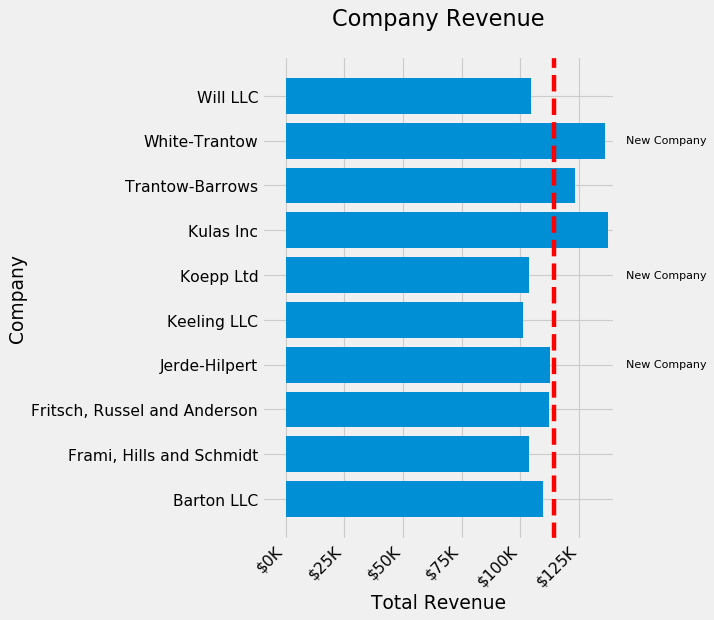

In [16]:
Image('sales.png')